In [104]:
# Basic 

import os
import random
import re
import math
import time
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

# Scikit-learn

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

# Deep Learning

from tqdm import tqdm
from tqdm.keras import TqdmCallback
import tensorflow as tf, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
import efficientnet.tfkeras as efn
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam

# Visualization

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.tools import FigureFactory as FF
from plotly.offline import iplot
import seaborn as sns
%matplotlib inline

# Misc

import streamlit as st
from PIL import Image
import cufflinks
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')

In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import PIL
from IPython.display import Image, display
from keras.applications.vgg16 import VGG16,preprocess_input
# Plotly for the interactive viewer (see last section)
import plotly.graph_objs as go
import plotly.graph_objects as go
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model,load_model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten,BatchNormalization,Activation
from keras.layers import GlobalMaxPooling2D
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import skimage.io
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend as K
from livelossplot import PlotLossesKeras

In [106]:
# Setting file paths for our notebook:

base_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg'

train_dir = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train'
train_images = [f for f in listdir(train_img_path) if isfile(join(train_img_path, f))]

test_dir = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train'r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test'
test_images = [f for f in listdir(test_img_path) if isfile(join(test_img_path, f))]

img_stats_path = r'C:\Users\HIMANSHU\Downloads\Melanoma Dataset'

In [107]:
# Loading train and test data.

train = pd.read_csv(os.path.join(base_path, 'train.csv'))
test = pd.read_csv(os.path.join(base_path, 'test.csv'))
sample = pd.read_csv(os.path.join(base_path, 'sample_submission.csv'))

In [108]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [109]:
train['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [110]:
# Finding exact number of Fraud and Non-fraud values
# Fraud percentage is less than 1% of total transactions

Malignant = train[train['target'] == 1]
Benign = train[train['target'] == 0]

print('Malignant shape: {}'.format(fraud.shape))
print('Benign shape: {}'.format(normal.shape))
print('Percentage of Malignant: {:.4f}%'.format(len(Benign)/(len(Malignant)+len(Benign)) * 100))
print('Percentage of Malignant: {:.4f}%'.format(len(Malignant)/(len(Benign)+len(Malignant)) * 100))

Malignant shape: (584, 8)
Benign shape: (32542, 8)
Percentage of Malignant: 98.2370%
Percentage of Malignant: 1.7630%


Text(0, 0.5, 'Frequency')

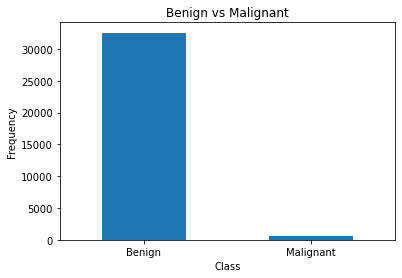

In [111]:
# 'Class' is the target variable
# It has two values counts - Fraud and Non-fraud
# Plot showing the counts of both counts
# Most of them are Non-fraud
# This is an unbalanced dataset

count_classes = pd.value_counts(train['target'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Benign vs Malignant')
plt.xticks(range(2), ['Benign', 'Malignant'])
plt.xlabel('Class')
plt.ylabel('Frequency')

In [112]:
labels=train['anatom_site_general_challenge'].value_counts().index
values=train['anatom_site_general_challenge'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [113]:
labels=train['diagnosis'].value_counts().index[1:]
values=train['diagnosis'].value_counts().values[1:]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [114]:
new=train.drop(labels=['image_name','patient_id','sex','age_approx','anatom_site_general_challenge','target'],axis=1)
pd.crosstab(new['diagnosis'].values,new['benign_malignant'])

benign_malignant,benign,malignant
row_0,,
atypical melanocytic proliferation,1,0
cafe-au-lait macule,1,0
lentigo NOS,44,0
lichenoid keratosis,37,0
melanoma,0,584
nevus,5193,0
seborrheic keratosis,135,0
solar lentigo,7,0
unknown,27124,0


In [115]:
df_0=train[train['target']==0].sample(2000)
df_1=train[train['target']==1]
train=pd.concat([df_0,df_1])
train=train.reset_index()

In [116]:
# print('Benign Cases')
# benign=[]
# df_benign=df_0.sample(40)
# df_benign=df_benign.reset_index()
# for i in range(40):
#     img = cv2.imread(str(train_dir + df_benign['image_name'].iloc[i]+'.jpg'))
#     img = cv2.resize(img, (224,224))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.astype(np.float32)/255.
#     benign.append(img)
# f, ax = plt.subplots(5,8, figsize=(10,8))
# for i, img in enumerate(benign):
#         ax[i//8, i%8].imshow(img)
#         ax[i//8, i%8].axis('off')
        
# plt.show()

In [117]:
str(train_dir + df_benign['image_name'].iloc[0]+'.jpg')

'C:\\Users\\HIMANSHU\\Downloads\\Melanoma jpg\\trainISIC_8299820.jpg'

Examples WITH Melanoma


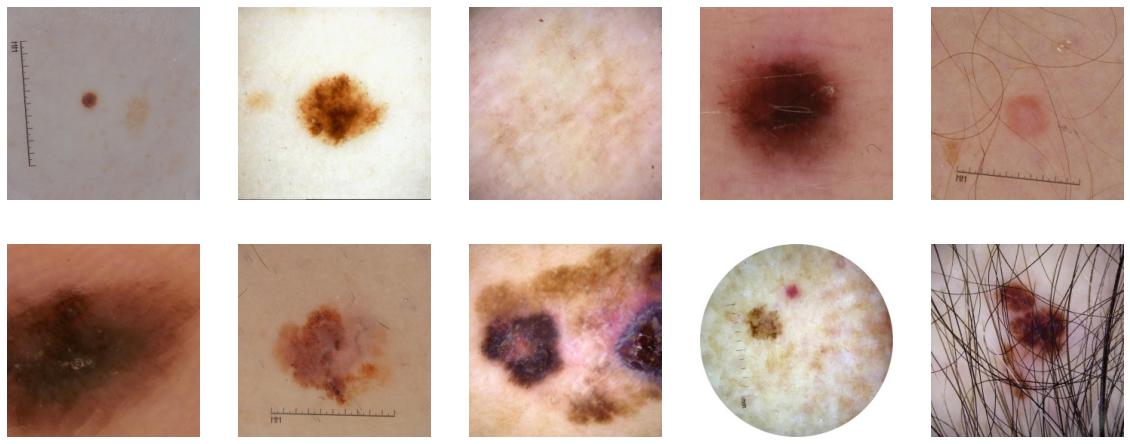

In [118]:
import cv2, pandas as pd, matplotlib.pyplot as plt

train = pd.read_csv(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train.csv')
print('Examples WITH Melanoma')

imgs = train.loc[train.target==1].sample(10).image_name.values
plt.figure(figsize=(20,8))

for i,k in enumerate(imgs):
    img = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\%s.jpg'%k)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(2,5,i+1); plt.axis('off')
    plt.imshow(img)
plt.show()

Examples WITHOUT Melanoma


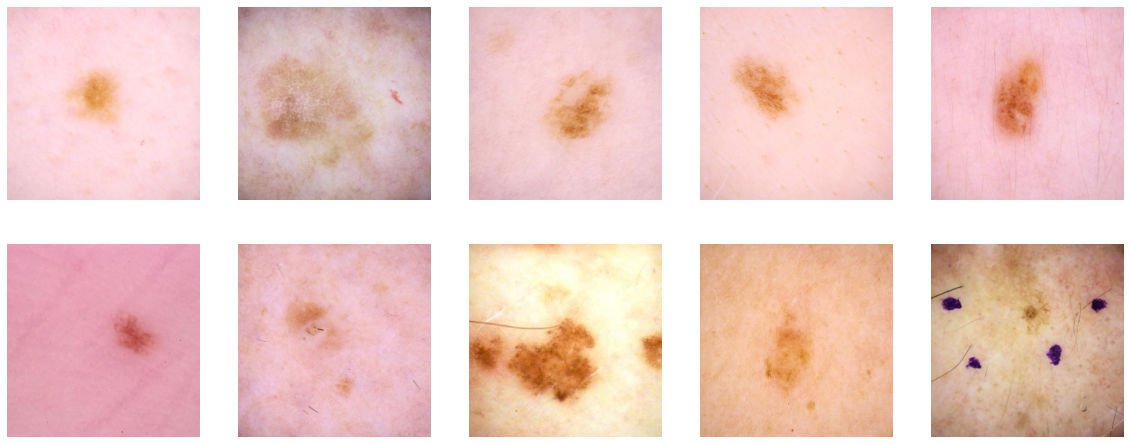

In [119]:
print('Examples WITHOUT Melanoma')
imgs = train.loc[train.target==0].sample(10).image_name.values
plt.figure(figsize=(20,8))
for i,k in enumerate(imgs):
    img = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\%s.jpg'%k)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(2,5,i+1); plt.axis('off')
    plt.imshow(img)
plt.show()

In [120]:
labels=[]
data=[]
for i in range(train.shape[0]):
    data.append(train_dir + train['image_name'].iloc[i]+'.jpg')
    labels.append(train['target'].iloc[i])
df=pd.DataFrame(data)
df.columns=['images']
df['target']=labels

In [121]:
test_data=[]
for i in range(test.shape[0]):
    test_data.append(test_dir + test['image_name'].iloc[i]+'.jpg')
df_test=pd.DataFrame(test_data)
df_test.columns=['images']

In [122]:
X_train, X_val, y_train, y_val = train_test_split(df['images'],df['target'], test_size=0.2, random_state=1234)

train=pd.DataFrame(X_train)
train.columns=['images']
train['target']=y_train

validation=pd.DataFrame(X_val)
validation.columns=['images']
validation['target']=y_val

In [123]:
train

,images,target
17064,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
7157,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
3266,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
7791,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
28622,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
...,...,...
9449,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
32399,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
17048,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
23924,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0


In [124]:
validation

,images,target
3283,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
8880,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
32936,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
25307,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
13310,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
...,...,...
2423,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
3617,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
10754,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0
9974,C:\Users\HIMANSHU\Downloads\Melanoma jpg\train...,0


I'll do some very basic preprocessing like

normalizing
reshaping
augmentation(only for tarin data)

In [125]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train,
    x_col='images',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    shuffle=True,
    class_mode='raw')

validation_generator = val_datagen.flow_from_dataframe(
    validation,
    x_col='images',
    y_col='target',
    target_size=(224, 224),
    shuffle=False,
    batch_size=8,
    class_mode='raw')

Found 0 validated image filenames.
Found 0 validated image filenames.


In [127]:
def vgg16_model( num_classes=None):

    model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x=Flatten()(model.output)
    output=Dense(1,activation='sigmoid')(x) # because we have to predict the AUC
    model=Model(model.input,output)
    
    return model

vgg_conv=vgg16_model(1)

58892288/58889256 [==============================] - 258s 4us/step


In [128]:
def focal_loss(alpha=0.25,gamma=2.0):
    def focal_crossentropy(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        
        y_pred = K.clip(y_pred, K.epsilon(), 1.- K.epsilon())
        p_t = (y_true*y_pred) + ((1-y_true)*(1-y_pred))
        
        alpha_factor = 1
        modulating_factor = 1

        alpha_factor = y_true*alpha + ((1-alpha)*(1-y_true))
        modulating_factor = K.pow((1-p_t), gamma)

        # compute the final loss and return
        return K.mean(alpha_factor*modulating_factor*bce, axis=-1)
    return focal_crossentropy

In [129]:
opt = Adam(lr=1e-5)
vgg_conv.compile(loss=focal_loss(), metrics=[tf.keras.metrics.AUC()],optimizer=opt)

In [130]:
nb_epochs = 2
batch_size=8
nb_train_steps = train.shape[0]//batch_size
nb_val_steps=validation.shape[0]//batch_size
print("Number of training and validation steps: {} and {}".format(nb_train_steps,nb_val_steps))

Number of training and validation steps: 3312 and 828


In [ ]:
cb=[PlotLossesKeras()]
vgg_conv.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_steps,
    epochs=nb_epochs,
    validation_data=validation_generator,
    callbacks=cb,
    validation_steps=nb_val_steps)

Epoch 1/2


In [ ]:
target=[]
for path in df_test['images']:
    img=cv2.imread(str(path))
    img = cv2.resize(img, (224,224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    img=np.reshape(img,(1,224,224,3))
    prediction=vgg_conv.predict(img)
    target.append(prediction[0][0])

submission['target']=target

In [ ]:
submission.to_csv('submission.csv', index=False)
submission.head()